In [6]:
.........................................................#Loading all Packages
import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

In [8]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('Cleaned_Data.csv')
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   Attrition                          1470 non-null   int64
 3   BusinessTravel                     1470 non-null   int64
 4   DailyRate                          1470 non-null   int64
 5   DistanceFromHome                   1470 non-null   int64
 6   Education                          1470 non-null   int64
 7   EmployeeCount                      1470 non-null   int64
 8   EmployeeNumber                     1470 non-null   int64
 9   EnvironmentSatisfaction            1470 non-null   int64
 10  HourlyRate                         1470 non-null   int64
 11  JobInvolvement           

In [9]:
del df['Unnamed: 0']
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [10]:
df.shape

(1470, 51)

### Breaking Data into Training , Validation and testing set

In [12]:
#start_time = time.time()
r_state=52
train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 826
For Validation Set : 276
For Test Set : 368


Acc Train: 0.863196, Acc Test:0.822464
Acc Train: 0.854722, Acc Test:0.800725
Acc Train: 0.851090, Acc Test:0.804348
Acc Train: 0.860775, Acc Test:0.804348


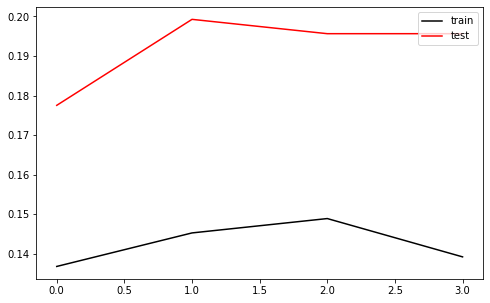

In [13]:
C_values = [0.01,0.1,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [14]:
models = (svm.SVC(kernel='linear', C=0.01),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.01, coef0=0.25))


for idx,model in enumerate(models):
    model.fit(x_train,y_train)
    tr_error = 1-model.score(x_train,y_train)
    val_error = 1-model.score(x_val,y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))

Model:0, Train Error:0.136804, Val Error:0.177536, Test Error:0.149457
Model:1, Train Error:0.162228, Val Error:0.170290, Test Error:0.152174
Model:2, Train Error:0.000000, Val Error:0.170290, Test Error:0.152174
Model:3, Train Error:0.162228, Val Error:0.170290, Test Error:0.152174


In [15]:
clf = svm.SVC(kernel='linear', C=0.01,random_state=52) # SVC stands for support vector classification
clf.fit(x_train, y_train)

SVC(C=0.01, kernel='linear', random_state=52)

57
['age', 'businesstravel', 'dailyrate', 'degree', 'department_human', 'department_research', 'department_sales', 'development', 'director', 'distancefromhome', 'education', 'educationfield_human', 'educationfield_life', 'educationfield_marketing', 'educationfield_medical', 'educationfield_other', 'educationfield_technical', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'executive', 'gender_female', 'gender_male', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole_healthcare', 'jobrole_human', 'jobrole_laboratory', 'jobrole_manager', 'jobrole_manufacturing', 'jobrole_research', 'jobrole_sales', 'jobsatisfaction', 'maritalstatus_divorced', 'maritalstatus_married', 'maritalstatus_single', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'representative', 'resources', 'sciences', 'scientist', 'stockoptionlevel', 'technician', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebala

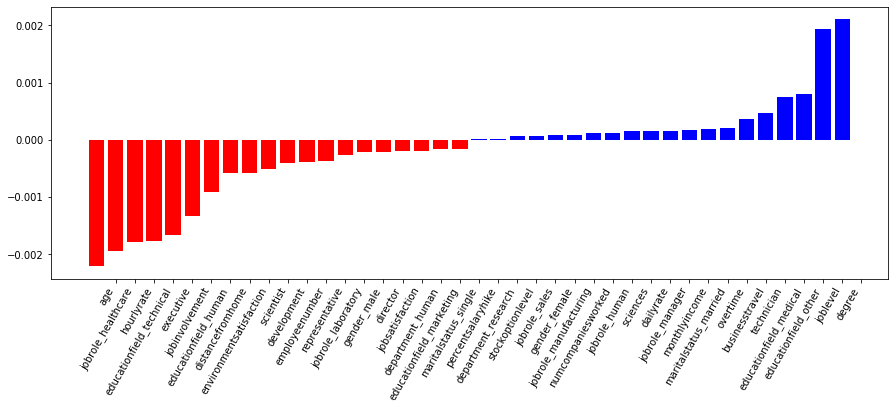

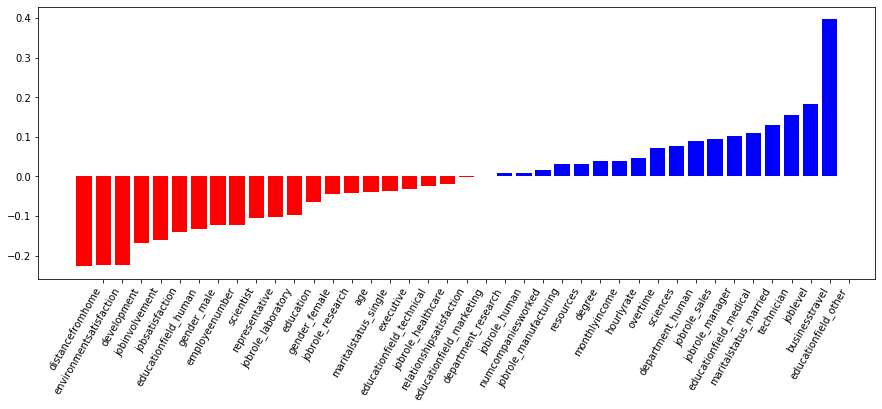

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

from sklearn.svm import LinearSVC
cv = CountVectorizer()
cv.fit(x_train)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x_train, y_train)
plot_coefficients(svm, cv.get_feature_names())
plot_coefficients(clf,cv.get_feature_names())

In [17]:
start_time = time.time()
from sklearn import svm
clf = svm.SVC(kernel='linear', C=0.1,random_state=52) # SVC stands for support vector classification
clf.fit(x_train, y_train)
model=clf

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          298  45
1           14  11
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       312
           1       0.44      0.20      0.27        56

    accuracy                           0.84       368
   macro avg       0.65      0.58      0.59       368
weighted avg       0.80      0.84      0.81       368

0.8396739130434783
Duration: --- 2.5536296049753826 Minutes ---
